<ipython-input-1-6351e77fd02b>:3: DeprecationWarning: BasicAer is deprecated since Qiskit 0.46 and will be removed in Qiskit 1.0. The BasicAer (qiskit.providers.basicaer) module has been superseded by  qiskit.providers.basic_provider, and all its classes have been renamed to follow a new naming convention. More information and migration guidelines can be found in the 0.46 API docs for BasicAer.
  from qiskit import IBMQ, BasicAer
<ipython-input-1-6351e77fd02b>:8: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.save_account(MY_API_TOKEN)
<ipython-input-1-6351e77fd02b>:8: DeprecationWarning: The package qiskit.providers.ibmq 

Количество итераций с наибольшей амплитудой: 8


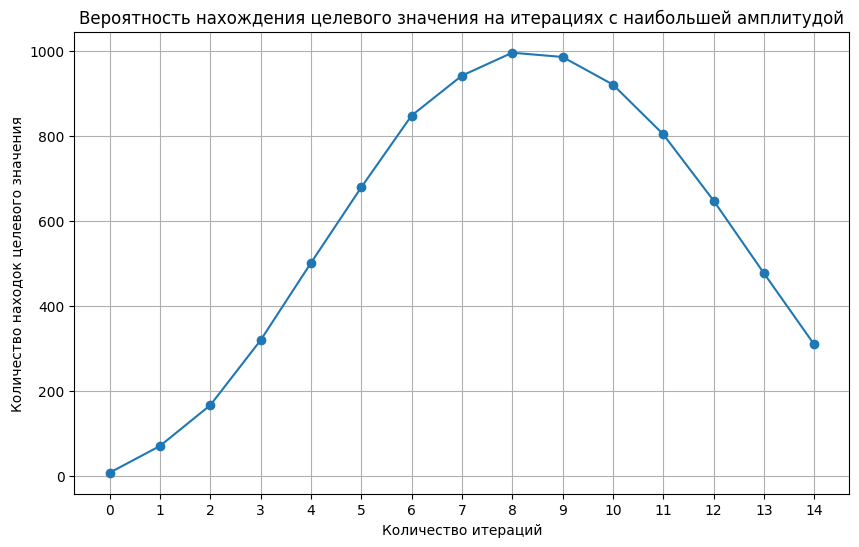

In [1]:
!pip install qiskit==0.46 qiskit-ibmq-provider pylatexenc qiskit-aer

from qiskit import IBMQ, BasicAer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
import numpy as np
import matplotlib.pyplot as plt
MY_API_TOKEN = 'f89f0b6f9c06938606112ca1955f77b92ff58df85964b70b2d4f798ed613f1c76a794247c5e56a941cb4bf6531bf2dc282469dd779a51abea5134d42a538d7a5'
IBMQ.save_account(MY_API_TOKEN)

IBMQ.load_account()
n = 7
backend = Aer.get_backend('qasm_simulator')
prob_of_ans = []
target_value = '0111111'
for x in range(15):
    database = QuantumRegister(n)
    oracle = QuantumRegister(1)
    auxiliary = QuantumRegister(n-1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(database, oracle, auxiliary, cr)

    qc.h(database[:])
    qc.x(oracle[0])
    qc.h(oracle[0])

    for j in range(x):
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])
        qc.mct(database[:], oracle[0], auxiliary[:])
        for k in range(n):
            if target_value[k] == '0':
                qc.x(database[k])

        qc.h(database[:])
        qc.x(database[:])
        qc.h(database[n-1])
        qc.mct(database[:-1], database[n-1], auxiliary[:])
        qc.h(database[n-1])
        qc.x(database[:])
        qc.h(database[:])

    qc.h(oracle[0])
    qc.x(oracle[0])
    qc.measure(database, cr)
    qc = qc.reverse_bits()

    job = execute(qc, backend=backend, shots=1000)
    result = job.result()
    count = result.get_counts()

    answer = count.get(target_value, 0)
    prob_of_ans.append(answer)
    max_amplitude_iterations = np.argmax(prob_of_ans)
print(f'Количество итераций с наибольшей амплитудой: {max_amplitude_iterations}')

plt.figure(figsize=(10, 6))
plt.plot(range(15), prob_of_ans, marker='o')
plt.title('Вероятность нахождения целевого значения на итерациях с наибольшей амплитудой')
plt.xlabel('Количество итераций')
plt.ylabel('Количество находок целевого значения')
plt.xticks(range(15))
plt.grid()
plt.show()